<a href="https://colab.research.google.com/github/vlad98rus/-netology_pyda/blob/HomeWork-1/DZ_KNN_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа Полиномиальная регрессия и метрики близости (kNN)

### Задание 1

Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [2]:
pip install python-levenshtein

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144671 sha256=aa9abcc6b036ce94c535aa907bf48dfc945388572637efa88c38930a359712f3
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein


In [0]:
import Levenshtein

что было написано в заявке

In [0]:
claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

результат расшифровки речи диктора

In [0]:
speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

In [0]:
d = {}
for real_name in claim_list:
    d[real_name] = sorted({recognized_name: Levenshtein.distance(recognized_name, real_name) 
    for recognized_name in speech_recognition}.items(), key = lambda x: x[1])[0][0]

In [7]:
print('Наиболее вероятные соотвествия:\n')
print(*[i + " ~ " + d[i] + "\n" for i in d])

Наиболее вероятные соотвествия:

Шехавцова Анна ~ шиховцева на
 Гречихина Наталья ~ рычихина наталья
 Козлова Алена ~ груздь алина
 Груздева Алина ~ груздь алина
 Кущенко Анна ~ кучменко она
 Чистякова Анастасия ~ чистова анастасия



### Задание 2

Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [0]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем наши данные

In [0]:
digits = datasets.load_digits()

Пример первой цифры

In [12]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [0]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

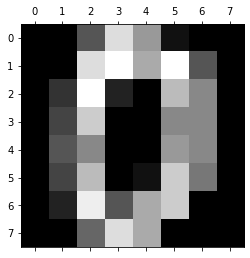

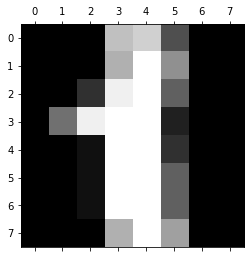

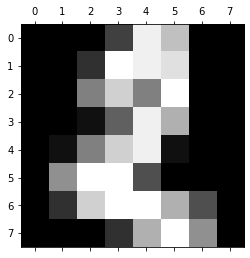

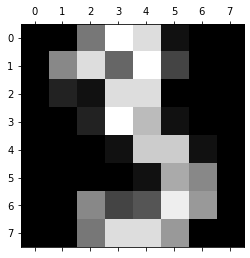

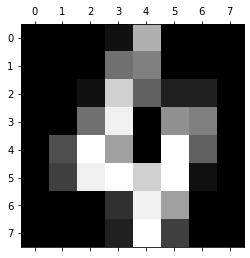

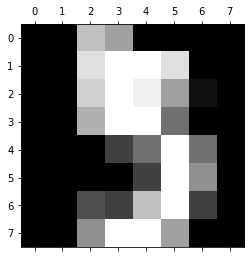

In [17]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [0]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [0]:
n_samples = len( X_digits )

Разобьем данные на обучающую выборку и тест в пропорции 80 / 20

In [28]:
split = int( n_samples * .8 )
split

1437

Обучающая выборка

In [0]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель KNN

In [0]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [0]:
model = KNeighborsClassifier( n_neighbors = 5 )

In [32]:
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
Y_pred = model.predict( X_test )

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9638888888888889

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 33  0  1  0  1  1  0]
 [ 0  0  0  0 35  0  0  1  1  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 30  0]
 [ 0  0  0  1  0  2  0  0  0 34]]


In [38]:
model.score( X_test, Y_test )

0.9638888888888889